In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# On Kaggle Notebook, after adding the data, you can import the data as Pandas DataFrame as follows
import pandas as pd
df = pd.read_csv("../input/income-classification/income_evaluation.csv")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/income-classification/income_evaluation.csv


In [2]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


In [2]:
#continuous variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [5]:
# The number of unique values in each categorical variable
print(df[" workclass"].value_counts())
print(df[" education"].value_counts())
print(df[" marital-status"].value_counts())
print(df[" occupation"].value_counts())
print(df[" relationship"].value_counts())
print(df[" race"].value_counts())
print(df[" sex"].value_counts())
print(df[" native-country"].value_counts())

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name:  workclass, dtype: int64
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name:  education, dtype: int64
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name:  marital-status, dtype: int64
 Prof-specialty       4140
 Craft-repair         4099
 Exec-manager

/tmp/ipykernel_34/3499955269.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


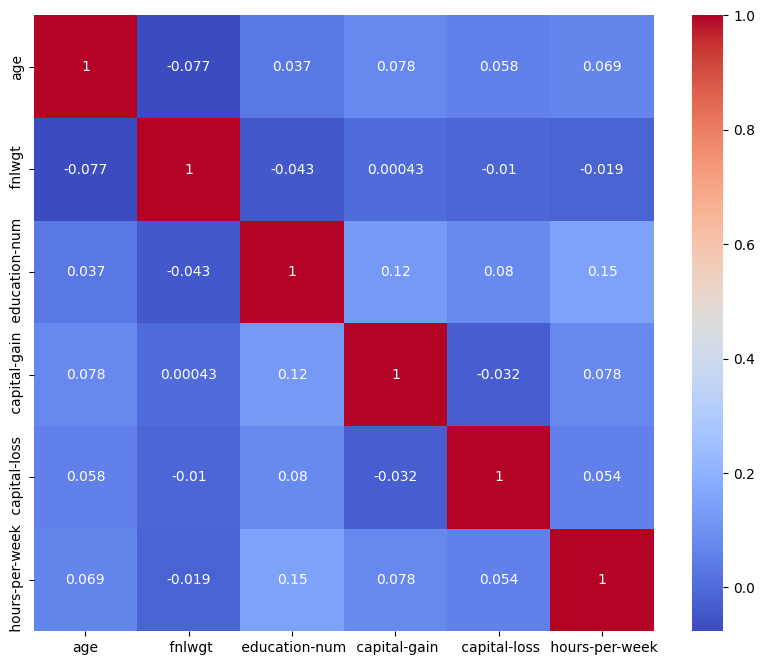

                      age    fnlwgt   education-num   capital-gain  \
age              1.000000 -0.076646        0.036527       0.077674   
 fnlwgt         -0.076646  1.000000       -0.043195       0.000432   
 education-num   0.036527 -0.043195        1.000000       0.122630   
 capital-gain    0.077674  0.000432        0.122630       1.000000   
 capital-loss    0.057775 -0.010252        0.079923      -0.031615   
 hours-per-week  0.068756 -0.018768        0.148123       0.078409   

                  capital-loss   hours-per-week  
age                   0.057775         0.068756  
 fnlwgt              -0.010252        -0.018768  
 education-num        0.079923         0.148123  
 capital-gain        -0.031615         0.078409  
 capital-loss         1.000000         0.054256  
 hours-per-week       0.054256         1.000000  


In [5]:
corr_matrix = df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

print(corr_matrix)

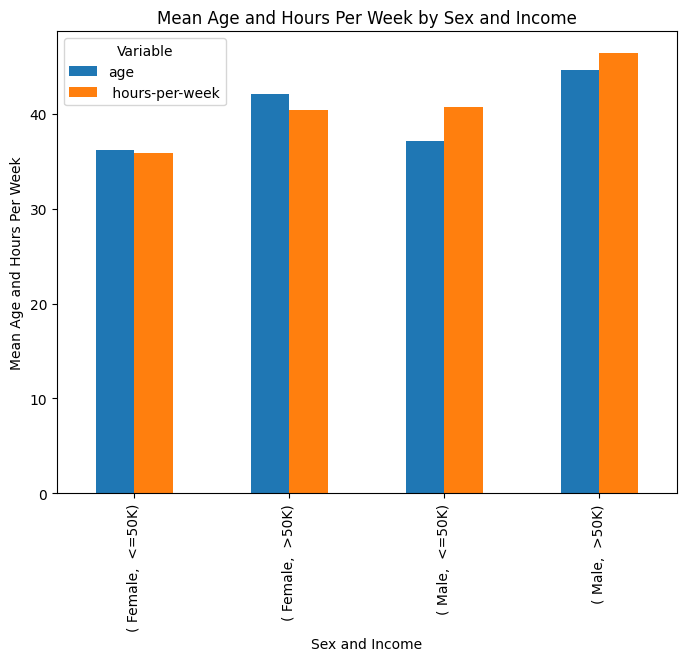

In [4]:
df.groupby([' sex', ' income'])[['age', ' hours-per-week']].mean()

# Groupby and calculate means
grouped = df.groupby([' sex', ' income'])[['age', ' hours-per-week']].mean()

# Create bar plot
grouped.plot(kind='bar', figsize=(8,6))

# Set plot properties
plt.title('Mean Age and Hours Per Week by Sex and Income')
plt.xlabel('Sex and Income')
plt.ylabel('Mean Age and Hours Per Week')
plt.legend(title='Variable', loc='upper left')

# Show the plot
plt.show()



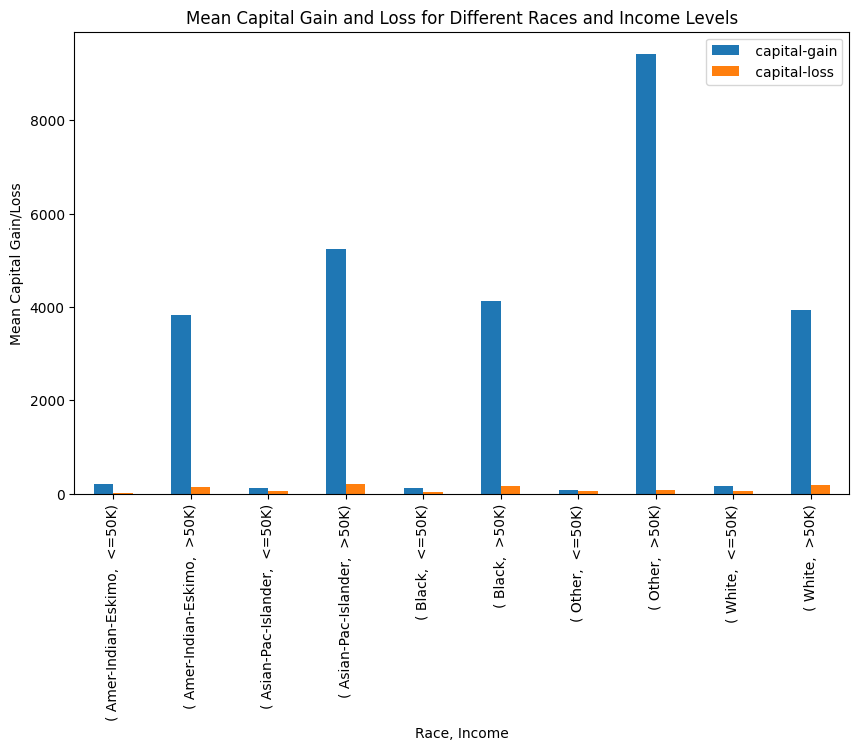

In [11]:
df.groupby([' race', ' income'])[[' capital-gain', ' capital-loss']].mean()

grouped_df = df.groupby([' race', ' income'])[[' capital-gain', ' capital-loss']].mean()
grouped_df.plot(kind='bar', figsize=(10, 6))
plt.title('Mean Capital Gain and Loss for Different Races and Income Levels')
plt.xlabel('Race, Income')
plt.ylabel('Mean Capital Gain/Loss')
plt.show()


In [12]:
from imblearn.over_sampling import RandomOverSampler

X = df.drop(' income', axis=1)
y = df[' income']

# Instantiate the oversampler
oversampler = RandomOverSampler()

# Resample the data
X_resampled, y_resampled = oversampler.fit_resample(X, y)


In [14]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from scikitplot.metrics import plot_roc_curve
import pandas as pd


In [15]:
# Select categorical features
cat_features = [' workclass', ' education', ' marital-status', ' occupation', ' relationship', ' race', ' sex', ' native-country', ' State-gov']

# One-hot encode categorical features
X_encoded = pd.get_dummies(X, columns=cat_features)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)



In [16]:
#defining the Pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', None)
])


In [17]:
# Define the hyperparameter grids for three algorithm
logistic_regression_hyperparameters = {
    'classifier': [LogisticRegression()],
    'classifier__C': [0.1, 1, 10],
    'classifier__penalty': ['l1', 'l2'],
}

knn_hyperparameters = {
    'classifier': [KNeighborsClassifier()],
    'classifier__n_neighbors': [3, 5, 7],
    'classifier__weights': ['uniform', 'distance'],
}

random_forest_hyperparameters = {
    'classifier': [RandomForestClassifier()],
    'classifier__n_estimators': [100, 500, 1000],
    'classifier__max_depth': [3, 5, 7],
}

In [26]:
import warnings
warnings.filterwarnings("ignore")

# Define the hyperparameter search space
hyperparameters = [logistic_regression_hyperparameters, knn_hyperparameters, random_forest_hyperparameters]

# Train and evaluate the models
for hyperparameter in hyperparameters:
    print('-' * 40)
    print('Hyperparameter:', hyperparameter['classifier'])
    
    # Define the RandomizedSearchCV
    random_search = RandomizedSearchCV(pipeline, hyperparameter, cv=5, n_iter=9, scoring='accuracy', n_jobs=-1, verbose=1)
    
    # Fit the RandomizedSearchCV
    random_search.fit(X_train, y_train)
    
    # Get the best estimator
    best_estimator = random_search.best_estimator_
    
    # Predict on the test set
    y_pred = random_search.predict(X_test)
    

----------------------------------------
Hyperparameter: [LogisticRegression(C=1)]
Fitting 5 folds for each of 6 candidates, totalling 30 fits


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


----------------------------------------
Hyperparameter: [KNeighborsClassifier(n_neighbors=7)]
Fitting 5 folds for each of 6 candidates, totalling 30 fits
----------------------------------------
Hyperparameter: [RandomForestClassifier(max_depth=7)]
Fitting 5 folds for each of 9 candidates, totalling 45 fits


In [29]:
importances = pd.Series(best_estimator.named_steps['classifier'].feature_importances_, index=X.columns)
importances_sorted = importances.sort_values(ascending=False)
print(importances_sorted)


ValueError: Length of values (108) does not match length of index (14)

In [28]:
# Evaluate the performance
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, pos_label=' >50K'))
print('Recall:', recall_score(y_test, y_pred, pos_label=' >50K'))
print('F1-score:', f1_score(y_test, y_pred, pos_label=' >50K'))
print('ROC AUC score:', roc_auc_score(y_test, random_search.predict_proba(X_test)[:,1]))



Accuracy: 0.8506064793489944
Precision: 0.8095238095238095
Recall: 0.49777211966900065
F1-score: 0.6164761529365392
ROC AUC score: 0.9065208615999059


In [30]:
from sklearn.feature_selection import RFE

# Assuming best_estimator is your trained model
estimator = best_estimator.named_steps['classifier']
n_features = X.shape[1]  # number of features in X

# Specify the number of features you want to keep
n_keep = 5

# Create an instance of the RFE selector with the logistic regression estimator
selector = RFE(estimator=estimator, n_features_to_select=n_keep)

# Fit the selector to the training data
selector = selector.fit(X, y)

# Print the ranking of the features based on their importance
rankings = selector.ranking_
feature_names = X.columns
importances_df = pd.DataFrame({'feature': feature_names, 'ranking': rankings})
importances_df = importances_df.sort_values('ranking', ascending=True)

print(importances_df.head(n_keep))


ValueError: could not convert string to float: ' State-gov'